In [1]:
import re 
import requests
import pandas as pd 
from tqdm import tqdm
from bs4 import BeautifulSoup

In [3]:
with open('urls.txt', 'r') as file:
    urls = [line.strip() for line in file]

In [4]:
cols = ['Lab test',
        'What is it used for', 
        'What is the test', 
        'Why do I need the test', 
        'What happens during the test?',
        'Will I need to do anything to prepare for the test?', 
        'Are there any risks to the test?', 
        'What do the results mean?', 
        'Is there anything else I need to know about the test?']

In [ ]:
url_item_arr = []

for url in tqdm(tqdm(urls)):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    sections = soup.find_all('section')
    url_item_arr += [section.find('h2').text for section in sections if section.find('h2') != None]

In [6]:
url_item_set = set(url_item_arr)
len(url_item_set)

1077

In [7]:
patterns = ['^.*(?:How|What).* use.*$',
            '^.*What (?:is|are).*$', 
            '^.*Why do I need.*$', 
            '^.*What happens during.*$', 
            '^.*Will I need.*prepare.*$',
            '^.*Are there any risks to.*$',
            '^.*What do.*(?:means|mean)*.$',
            '^.*Is there anything else I (?:need to|should) know about.*$']

In [8]:
for pattern in patterns:
  r = re.compile(pattern)
  same_list = list(filter(r.match, url_item_set)) 
  url_item_set = list(set(url_item_set)^set(same_list))

len(url_item_set)

31

In [9]:
url_item_set.sort()
url_item_set

['Can I continue taking medicine during a fast?',
 'Can I drink anything besides water during a fast?',
 'EKG vs ECG?',
 'How do I cope with medical test anxiety?',
 'How do I prepare for a lab test?',
 'How do I prepare my child for a lab test?',
 'How do you test for blood in urine?',
 'How do you test for mucus in urine?',
 'How do you test for nitrites in urine?',
 'How is cord blood banked?',
 'How is cord blood collected?',
 'How long do I have to fast before the test?',
 'How will my provider make a differential diagnosis?',
 'Is there any preparation needed for cord blood testing or banking?',
 'MedlinePlus Genetics',
 'References',
 'Related Health Topics',
 'Related Medical Tests',
 'What causes obesity?',
 'What else happens during a burn evaluation?',
 'What factors can affect my results?',
 'What happens to my child during a lab test?',
 'What if I make a mistake and have something to eat or drink besides water during my fast?',
 'What types of blood tests require fasting?

In [10]:
def column_check(section):
  patterns = ['^.*(?:How|What).* use.*$',
            '^.*What (?:is|are).*$', 
            '^.*Why do I need.*$', 
            '^.*What happens during.*$', 
            '^.*Will I need.*prepare.*$',
            '^.*Are there any risks to.*$',
            '^.*What do.*(?:means|mean)*.$',
            '^.*Is there anything else I (?:need to|should) know about.*$']

  for index, pattern in enumerate(patterns):
    if bool(re.match(pattern, section)):
      return index + 1

In [11]:
column_check('What is this test used for?')

1

In [58]:
df = pd.DataFrame('', index=range(len(urls)), columns=range(len(cols)))

for url_index, url in enumerate(tqdm(urls)):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    df[0][url_index] = soup.find('h1').text

    sections = soup.find_all('section')
    for section in sections:
        if hasattr(section.find('h2'), 'text'):
            sec_index = column_check(section.find('h2').text)
            if sec_index != None:
              df[sec_index][url_index] = sections[sec_index - 1].text

100%|██████████| 258/258 [02:48<00:00,  1.53it/s]


In [59]:
df.columns = cols

In [60]:
df.head(5)

,Lab test,What is it used for,What is the test,Why do I need the test,What happens during the test?,Will I need to do anything to prepare for the test?,Are there any risks to the test?,What do the results mean?,Is there anything else I need to know about the test?
0,17-Hydroxyprogesterone,What is a 17-hydroxyprogesterone (17-OHP) test...,What is it used for?A 17-OHP test is most ofte...,Why do I need a 17-OHP test?Your baby will nee...,What happens during a 17-OHP test?For a newbor...,Will I need to do anything to prepare for the ...,Are there any risks to the test?There is very ...,What do the results mean?If results show high ...,Is there anything else I need to know about a ...
1,Acetaminophen Level,What is an acetaminophen level test?\nThis tes...,What is it used for?\nThe test is used to find...,Why do I need an acetaminophen level test?\nYo...,What happens during an acetaminophen level tes...,Will I need to do anything to prepare for the ...,Are there any risks to an acetaminophen level ...,What do the results mean?\nIf results show a h...,Is there anything else I need to know about an...
2,Acid-Fast Bacillus (AFB) Tests,What are acid-fast bacillus (AFB) tests?\nAcid...,What are they used for?\nAFB tests are most of...,Why do I need an AFB test? \nYou may need an A...,What happens during AFB testing?\nYour health ...,Will I need to do anything to prepare for the ...,Are there any risks to the test?\nThere is no ...,What do the results mean?\nIf your results on ...,Is there anything else I need to know about AF...
3,ADHD Screening,"What is ADHD screening?ADHD screening, also ca...",What is it used for?ADHD screening is used to ...,Why do I need ADHD screening?Your health care ...,What happens during an ADHD screening?There is...,Will I need to do anything to prepare for ADHD...,Are there any risks to screening?There is no r...,"What do the results mean?If results show ADHD,...",Is there anything else I need to know about AD...
4,Adrenocorticotropic Hormone (ACTH),What is an adrenocorticotropic hormone (ACTH) ...,What is it used for?\nAn ACTH test is often do...,Why do I need an ACTH test?You may need this t...,What happens during an ACTH test?A health care...,Will I need to do anything to prepare for the ...,Are there any risks to the test?There is very ...,What do the results mean?Results of an ACTH te...,Is there anything else I need to know about an...


In [61]:
df.loc[100]

Lab test                                                                              Fall Risk Assessment
What is it used for                                      What is a fall risk assessment?\nFalls are com...
What is the test                                         What is it used for?\nA fall risk assessment i...
Why do I need the test                                   Why do I need a fall risk assessment?\nThe Cen...
What happens during the test?                            What happens during a fall risk assessment?\nM...
Will I need to do anything to prepare for the test?      Will I need to do anything to prepare for a fa...
Are there any risks to the test?                         Are there any risks to a fall risk assessment?...
What do the results mean?                                What do the results mean?\nThe results may sho...
Is there anything else I need to know about the test?                                                     
Name: 100, dtype: object

In [62]:
df.loc[100]['Why do I need the test']

'Why do I need a fall risk assessment?\nThe Centers for Disease Control and Prevention (CDC) and the American Geriatric Society recommend yearly fall assessment screening for all adults 65 years of age and older. If the screening shows you are at risk, you may need an assessment. The assessment includes performing a series of tasks called fall assessment tools.\nYou also may need an assessment if you have certain symptoms. Falls often come without warning, but if you have any of the following symptoms, you may be at higher risk:\n\nDizziness\nLight-headedness\nIrregular or rapid heartbeats\n\n'

In [63]:
df.loc[203]

Lab test                                                                     Protein C and Protein S Tests
What is it used for                                      What are protein C and protein S tests?\nThese...
What is the test                                         What are they used for?\nProtein C and protein...
Why do I need the test                                   Why do I need protein C and protein S tests?\n...
What happens during the test?                            What happens during protein C and protein S te...
Will I need to do anything to prepare for the test?      Will I need to do anything to prepare for the ...
Are there any risks to the test?                         Are there any risks to the test?\nThere is ver...
What do the results mean?                                What do the results mean?\nIf your results sho...
Is there anything else I need to know about the test?    Is there anything else I need to know about pr...
Name: 203, dtype: object

In [64]:
df.loc[203]['Are there any risks to the test?']

'Are there any risks to the test?\nThere is very little risk to having a blood test. You may have slight pain or bruising at the spot where the needle was put in, but most symptoms go away quickly.\n\n'

In [65]:
df[df["What do the results mean?"] == ""]

,Lab test,What is it used for,What is the test,Why do I need the test,What happens during the test?,Will I need to do anything to prepare for the test?,Are there any risks to the test?,What do the results mean?,Is there anything else I need to know about the test?
48,Burn Evaluation,What is a burn evaluation?A burn is a type of ...,What are the different types of burns?The type...,,,,,,\n\nRelated Medical Tests\n\n\n\nHow to Unders...
75,Coronavirus Disease 2019 (COVID-19),,,,,,,,
101,Fasting for a Blood Test,,,How long do I have to fast before the test?\nY...,,,,,Is there anything else I need to know about fa...
132,How to Cope with Medical Test Anxiety,,What are the different types of medical tests?...,,,,,,
133,How to Prepare for a Lab Test,,,,,\n,,,\n
134,How to Prepare Your Child for a Lab Test,,,,,,,,Is there anything else I should know about pre...
251,What You Need to Know About Blood Testing,,What are the different types of blood tests?\n...,,\n,What happens during a blood test?\nA health ca...,Will I need to do anything to prepare for the ...,,\n


In [66]:
df = df.drop([48, 75, 101, 132, 133, 134, 251])

In [67]:
df.to_csv('medplus_labs.csv', index=False)

In [72]:
sections_list = cols[1:] + url_item_set

In [73]:
static_df = pd.DataFrame(0, index=sections_list, columns=['count'])

In [75]:
for url in tqdm(tqdm(urls)):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    sections = soup.find_all('section')

    for section in sections:
      if section.find('h2') != None:
        if column_check(section.find('h2').text):
          index = cols[column_check(section.find('h2').text)]
          static_df.loc[index]['count'] += 1
        else:
          index = section.find('h2').text
          static_df.loc[index]['count'] += 1

100%|██████████| 258/258 [02:51<00:00,  1.50it/s]


In [80]:
static_df.sort_values('count', ascending=False, inplace=True)

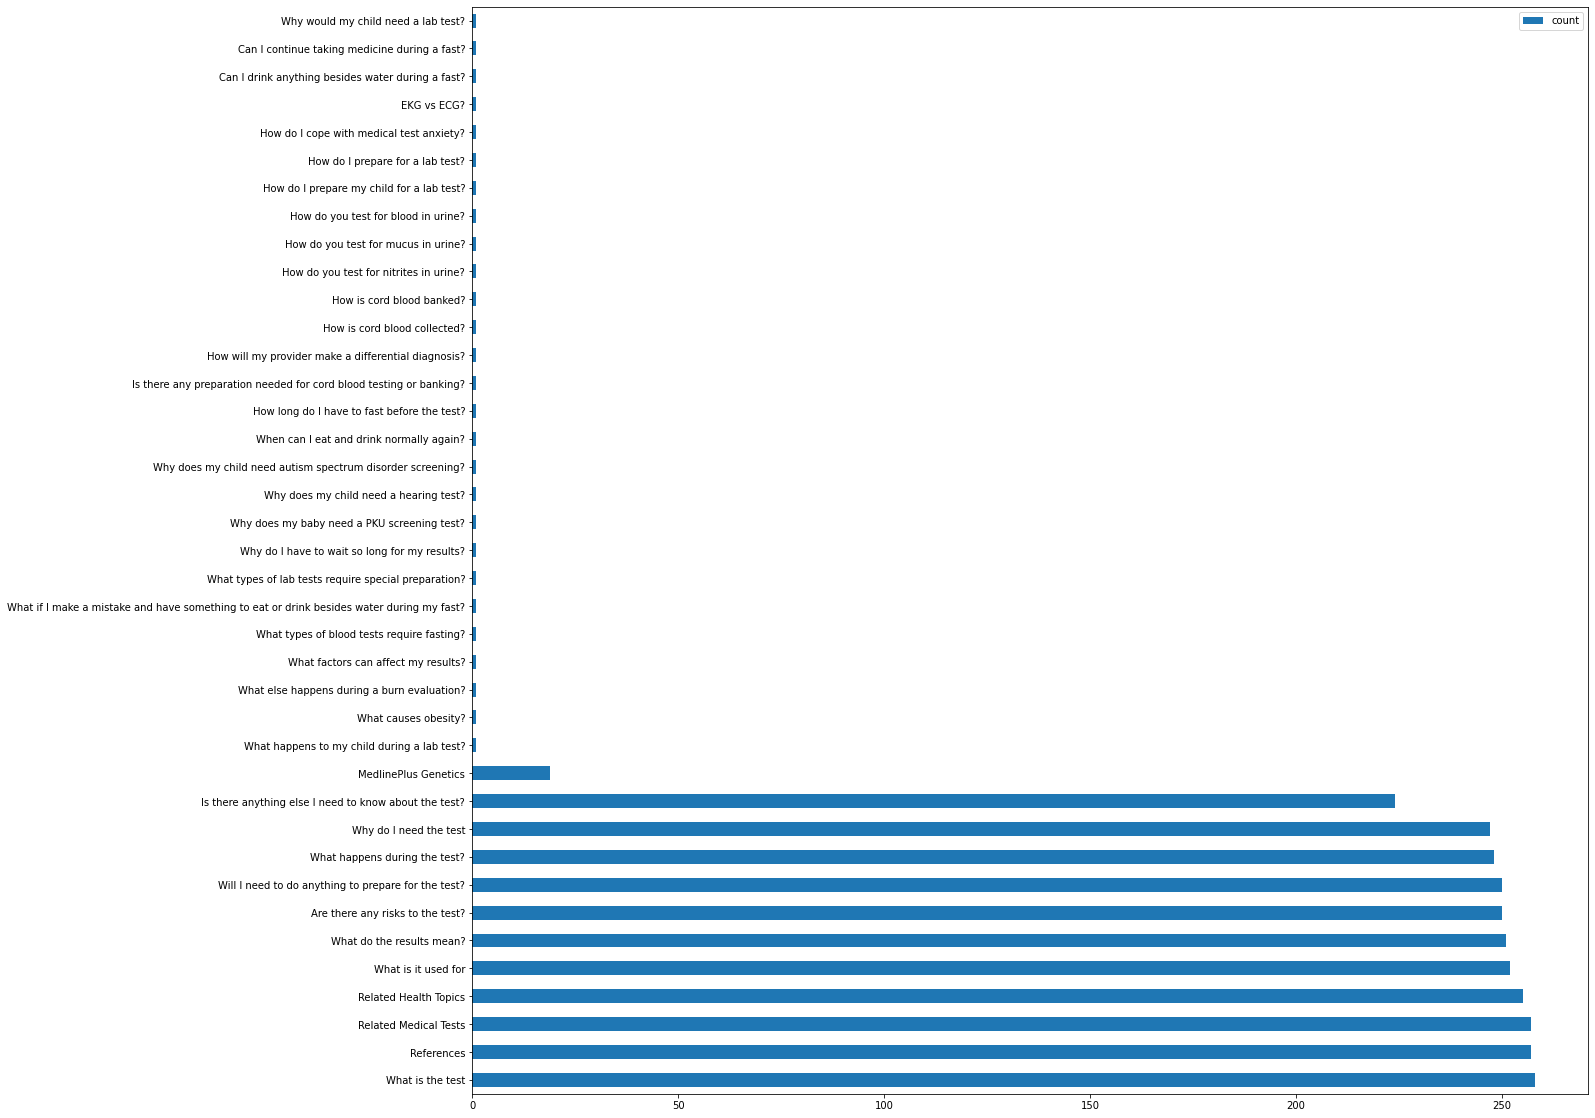

In [83]:
static_df.plot.barh(figsize=(20, 20))